# Customer Segmentation with PyCaret
This notebook performs basic customer segmentation using PyCaret's low-code clustering tools on `segmentation data.csv`.

Problem summary:
- Use customer data (age, gender, annual income, spending score, etc.) to segment customers.
- Provide a minimal workflow: load data, setup PyCaret clustering experiment, compare/create a clustering model, evaluate, save the model, and assign cluster labels.

Steps:
1. Load dataset (`segmentation data.csv`).
2. Initialize `ClusteringExperiment` and `setup`.
3. Use `compare_models()` to choose a clustering model (or create `kmeans`).
4. Evaluate the model and assign cluster labels.
5. Save the model for future use.

In [ ]:
# Imports
import pandas as pd

In [2]:
# Load dataset
data = pd.read_csv('segmentation data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# PyCaret clustering setup
from pycaret.clustering import ClusteringExperiment
c = ClusteringExperiment()
c.setup(data=data, session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Original data shape,"(2000, 8)"
2,Transformed data shape,"(2000, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [7]:
kmeans = c.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2246,523.2093,1.5095,0,0,0


In [10]:
c.models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


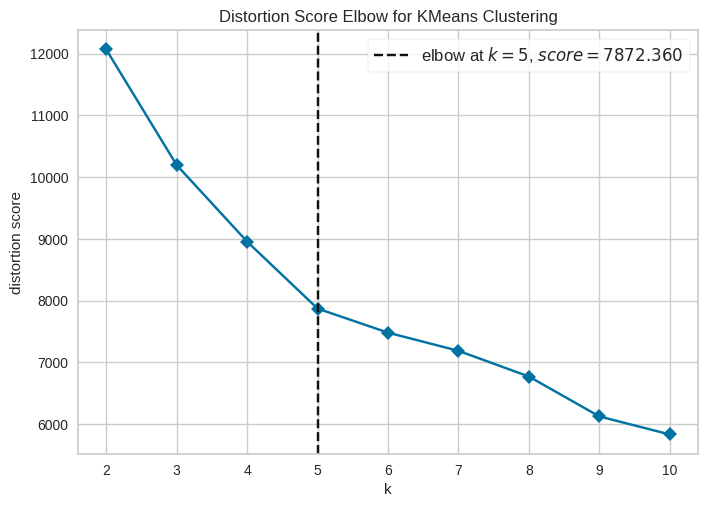

In [15]:
c.plot_model(kmeans, plot='cluster')
c.plot_model(kmeans,"elbow")

In [19]:
# Save the trained pipeline, assign cluster labels, and predict on data
c.save_model(kmeans, 'kmeans_segmentation_model')
# Assign cluster labels to the training data
assigned = c.assign_model(kmeans)
assigned.head()
# Predict cluster labels for new/unseen data (example uses same dataset)
predictions = c.predict_model(kmeans, data=data)
predictions.head()

Transformation Pipeline and Model Successfully Saved


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,Cluster 2
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,Cluster 3
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,Cluster 1
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,Cluster 3
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,Cluster 3
